In [97]:
from google.colab import drive

In [98]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 **1. Read Data**

In [99]:
## importing necessary packages !

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
train_data = pd.read_excel('/content/drive/MyDrive/flight price prediction project/Data_Train.xlsx')

In [101]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [102]:
train_data.tail(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


# 2.. Dealing with missing values


In [103]:
train_data.shape    ##(row, column)

(10683, 11)

In [104]:
# missing value: values which occur when no data is recorded for an observation..

train_data.isnull().sum()      ##computes total missing values column-wise

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [105]:
# getting all the rows where we have missing value

train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


#### As we have 1 missing value , I can directly drop these

In [106]:
train_data.dropna(inplace=True)      #removing missing value

In [107]:
train_data.isnull().sum()            #compute total missing values column-wise

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [108]:
#checking data type
train_data.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [109]:
'''
Date_of_Journey,Dep_Time, Arrival_Time are in Date time format but panda assign them as object.

So we have to convert them in datetime format
'''

'\nDate_of_Journey,Dep_Time, Arrival_Time are in Date time format but panda assign them as object.\n\nSo we have to convert them in datetime format\n'

In [110]:
data = train_data.copy()     #coping train_data into a new variable named data
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [111]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [112]:
import warnings    # to avoid seeing warning messages
from warnings import filterwarnings
filterwarnings("ignore")

In [113]:
def change_into_Datetime(col):               #converting data type of particular column
    data[col] = pd.to_datetime(data[col])

In [114]:
for feature in ['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']:       #changing data type of these column into datetime
    change_into_Datetime(feature)

In [115]:
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


## **3. Perform Data Pre-process & extract Derived attributes from "Date_of_Journey"**

In [116]:
data["Journey_day"] = data['Date_of_Journey'].dt.day      #spliting the state and telling our machine learning model that this is day, month and year
data["Journey_month"] = data['Date_of_Journey'].dt.month      #calling dt.month function to access month
data["Journey_year"] = data['Date_of_Journey'].dt.year        #calling dt.year function to access year

In [117]:
data.head(3)    #now it will show 3 extra column (J_day, J_month, J_year)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-08-26 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-08-26 05:50:00,2025-08-26 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-08-26 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


# **4. Cleaning Dep_Time & Arrival_Time & then extract Derived attributes**

In [118]:
def extract_hour_min(df , col):              #extracting arrival, departure time as machine learning dont know what exactly arrival, departure time
    df[col+"_hour"] = df[col].dt.hour          #df= data frame
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

In [119]:
extract_hour_min(data , "Dep_Time")           # extracting Dep_hour, Dep_minute from Dep_Time and put them in two separate coloumn
extract_hour_min(data , "Arrival_Time")      # extracting Arrival_hour, Arrival_minute from Arrival_Time and put them in two separate coloumn

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-08-26 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-08-26 05:50:00,2025-08-26 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-08-26 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [120]:
# we have extracted derived attributes from ['Arrival_Time' , "Dep_Time"] , so lets drop both these features ..
cols_to_drop = ['Arrival_Time' , "Dep_Time"]

data.drop(cols_to_drop , axis=1 , inplace=True )

In [121]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [122]:
data.shape

(10682, 16)

# ***5. Analyse when will most of the flights take-off***

In [123]:
#converting the flight Dep_Time into proper time (like mid_night, morning, afternoon and evening)

def flight_dep_time(x):
    '''
    This function takes the flight Departure time
    and convert into appropriate format.

    '''

    if (x>4) and (x<=8):
        return "Early Morning"

    elif (x>8) and (x<=12):
        return "Morning"

    elif (x>12) and (x<=16):
        return "Noon"

    elif (x>16) and (x<=20):
        return "Evening"

    elif (x>20) and (x<=24):
        return "Night"

    else:
        return "late night"

<Axes: xlabel='Dep_Time_hour'>

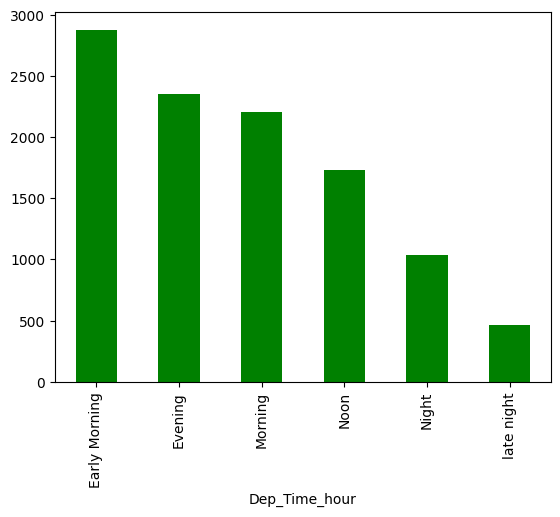

In [124]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar" , color="g")

# **6. Pre-process Duration Feature & extract meaningful features from it.**

In [125]:
'2h 50m'.split(' ')

['2h', '50m']

**Pre proccessing on Duration column**

In [126]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10


In [127]:
def preprocess_duration(x):        #identifying how what is the number of hour and minute in Duration coloumn
    if 'h' not in x:
        x = '0h' + ' ' + x          #0h xm
    elif 'm' not in x:
        x = x + ' ' +'0m'           #xh 0m

    return x

data['Duration'] = data['Duration'].apply(preprocess_duration)
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25


**Adding two new column 'Duration_hours' and 'Duration_mins' in our Data fram**

In [128]:
'2h 50m'.split(' ')

['2h', '50m']

In [129]:
'2h 50m'.split(' ')[0]

'2h'

In [130]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [131]:
type('2h 50m'.split(' ')[0][0:-1])

str

In [132]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [133]:
int('2h 50m'.split(' ')[1][0:-1])

50

In [134]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0


# **7. Analysing whether Duration impacts Price or not.**

In [135]:
2*60

120

In [136]:
eval('2*60')

120

In [137]:
data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)
data['Duration_total_mins']

,Duration_total_mins
0,170
1,445
2,1140
3,325
4,285
...,...
10678,150
10679,155
10680,180
10681,160


In [138]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445


In [139]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

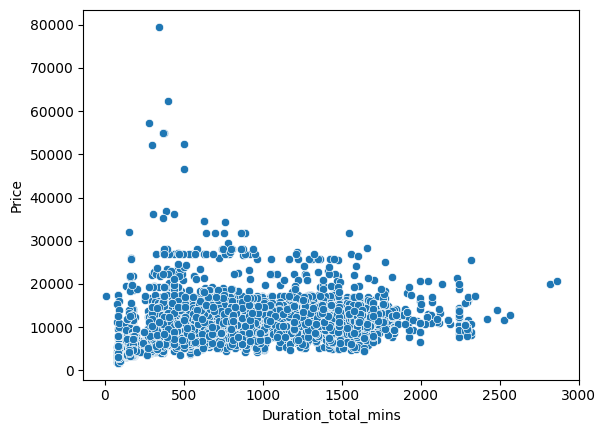

In [140]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , data=data)

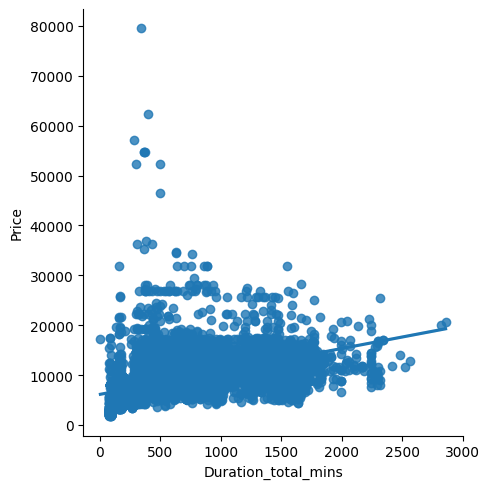

In [141]:
sns.lmplot(x="Duration_total_mins" , y="Price" , data=data)

# so, as the duration of minutes increases, Flight price also increases.

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

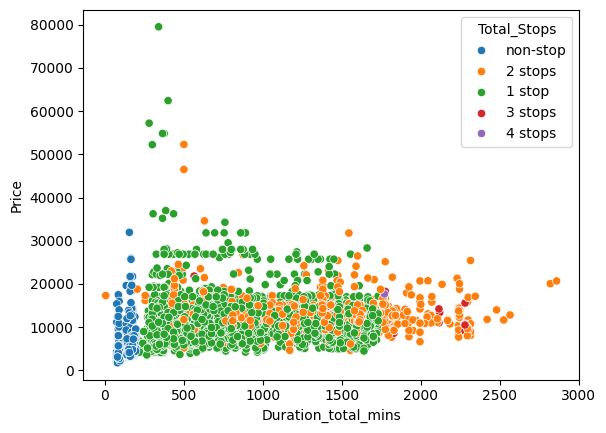

In [142]:
# checking if total stops affects price or not !

sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops", data=data)

In [143]:
'''
So, Non stops flights take less duration while their fare is also low, then as the stop increases,
duration also increases and price also increases(in most of the cases)

'''

'\nSo, Non stops flights take less duration while their fare is also low, then as the stop increases,\nduration also increases and price also increases(in most of the cases)\n\n'

# **8. Finding which routes Jet Airways use more**

In [144]:
data['Airline']=='Jet Airways'

,Airline
0,False
1,False
2,True
3,False
4,False
...,...
10678,False
10679,False
10680,True
10681,False


In [145]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)       #ascending=False= descending order

,0
Route,
CCU → BOM → BLR,930
DEL → BOM → COK,875
BLR → BOM → DEL,385
BLR → DEL,382
CCU → DEL → BLR,300
DEL → JAI → BOM → COK,207
BOM → HYD,207
DEL → AMD → BOM → COK,141
DEL → IDR → BOM → COK,86


In [146]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

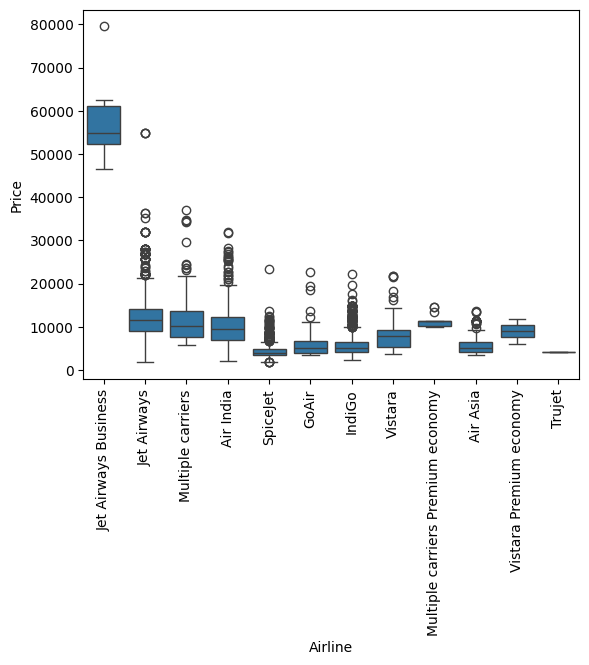

In [147]:
#airline vs Price Analysis

sns.boxplot(y='Price' , x='Airline' , data=data.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()

In [148]:
'''
From graph we can see that Jet Airways Business have the highest Price.,
..Apart from the first Airline almost all are having similar median

'''

'\nFrom graph we can see that Jet Airways Business have the highest Price.,\n..Apart from the first Airline almost all are having similar median\n\n'

# **9. Applying one-hot Encoding on data**

In [149]:
'''

Categorical data refers to a data type that can be stored into groups/categories/labels
Examples of categorical variables are  age group, educational level,blood type etc..


Numerical data refers to the data that is in the form of numbers,
Examples of numerical data are height, weight, age etc..

Numerical data has two categories: discrete data and continuous data


Discrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on.
                In case of infinity, these numbers will keep going on...
                age of a fly : 8 , 9 day etc..

Continuous data : which is continuous in nature
                  amount of sugar , 11.2 kg  , temp of a city  , our bank balance !


'''

'\n\nCategorical data refers to a data type that can be stored into groups/categories/labels\nExamples of categorical variables are  age group, educational level,blood type etc..\n\n\nNumerical data refers to the data that is in the form of numbers,\nExamples of numerical data are height, weight, age etc..\n\nNumerical data has two categories: discrete data and continuous data\n\n\nDiscrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on.\n                In case of infinity, these numbers will keep going on...\n                age of a fly : 8 , 9 day etc..\n\nContinuous data : which is continuous in nature\n                  amount of sugar , 11.2 kg  , temp of a city  , our bank balance !\n\n\n'

## ***One-hot encoding: the conversion of categorical information into a format that may be fed into machine learning algorithms to improve prediction accuracy.***

In [150]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]
num_col = [col for col in data.columns if data[col].dtype!="object"]

**Handling Categorical Data**

In [151]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [152]:
#applying One-hot from scratch :

data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [153]:
data['Source'].apply(lambda x : 1 if x=='Banglore' else 0)

,Source
0,1
1,0
2,0
3,0
4,1
...,...
10678,0
10679,0
10680,1
10681,1


In [154]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170


In [155]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)


data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


# **10.  Performing target guided encoding on Data**

    We can use One-hot , but if we have more sub-categories , it creates curse of dimensionality
    So we use Target Guided Mean Encoding in such case to get rid of curse of dimensionality..

In [156]:
'''
Now on 2 features , Airline & Destination , we can apply on-hot as there is no such order
but total_stops is my ordinal data , it makes no sense if we apply on-hot on top of this..
similarly if we have any feature which have more categories , it is not good to apply one-hot as it will create
curse of dimensionality issue , which leads to usage of more resources of our pc..

So we can think for appplying mean Encoding or better techniques like Target Guided Ordinal Encoding !

'''

'\nNow on 2 features , Airline & Destination , we can apply on-hot as there is no such order\nbut total_stops is my ordinal data , it makes no sense if we apply on-hot on top of this..\nsimilarly if we have any feature which have more categories , it is not good to apply one-hot as it will create\ncurse of dimensionality issue , which leads to usage of more resources of our pc..\n\nSo we can think for appplying mean Encoding or better techniques like Target Guided Ordinal Encoding !\n\n'

In [157]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [158]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [159]:
# target guided encoding for airline
airline_mean_price = data.groupby('Airline')['Price'].mean().sort_values(ascending=False)
print("Airline Mean Prices:")
print(airline_mean_price)

#airline encoding mapping
airline_encoding = {airline: idx for idx, airline in enumerate(airline_mean_price.index)}
print("\nAirline Encoding Mapping:")
print(airline_encoding)


data['Airline_encoded'] = data['Airline'].map(airline_encoding)    # applying encoding


Airline Mean Prices:
Airline
Jet Airways Business                 58358.666667
Jet Airways                          11643.923357
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9612.427756
Vistara Premium economy               8962.333333
Vistara                               7796.348643
GoAir                                 5861.056701
IndiGo                                5673.682903
Air Asia                              5590.260188
SpiceJet                              4338.284841
Trujet                                4140.000000
Name: Price, dtype: float64

Airline Encoding Mapping:
{'Jet Airways Business': 0, 'Jet Airways': 1, 'Multiple carriers Premium economy': 2, 'Multiple carriers': 3, 'Air India': 4, 'Vistara Premium economy': 5, 'Vistara': 6, 'GoAir': 7, 'IndiGo': 8, 'Air Asia': 9, 'SpiceJet': 10, 'Trujet': 11}


In [160]:
# target guided encoding for destination
destination_mean_price = data.groupby('Destination')['Price'].mean().sort_values(ascending=False)
print("Destination Mean Prices:")
print(destination_mean_price)

# destination encoding mapping
destination_encoding = {dest: idx for idx, dest in enumerate(destination_mean_price.index)}
print("\nDestination Encoding Mapping:")
print(destination_encoding)

data['Destination_encoded'] = data['Destination'].map(destination_encoding)   # applying encoding


Destination Mean Prices:
Destination
New Delhi    11917.716738
Cochin       10540.113536
Banglore      9158.389411
Delhi         5143.918577
Hyderabad     5059.708752
Kolkata       4789.892388
Name: Price, dtype: float64

Destination Encoding Mapping:
{'New Delhi': 0, 'Cochin': 1, 'Banglore': 2, 'Delhi': 3, 'Hyderabad': 4, 'Kolkata': 5}


In [161]:
# ordinal encoding for Total_Stops (since it has natural order)
stops_mapping = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}

print("Total_Stops unique values:")
print(data['Total_Stops'].value_counts())


data['Total_Stops_encoded'] = data['Total_Stops'].map(stops_mapping)           # applying ordinal encoding
print("\nTotal_Stops encoding applied successfully")


Total_Stops unique values:
Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

Total_Stops encoding applied successfully


In [162]:
# target guided encoding for Additional_Info
additional_info_mean_price = data.groupby('Additional_Info')['Price'].mean().sort_values(ascending=False)
print("Additional_Info Mean Prices:")
print(additional_info_mean_price)

# additional_info encoding mapping
additional_info_encoding = {info: idx for idx, info in enumerate(additional_info_mean_price.index)}
print("\nAdditional_Info Encoding Mapping:")
print(additional_info_encoding)


data['Additional_Info_encoded'] = data['Additional_Info'].map(additional_info_encoding)

Additional_Info Mean Prices:
Additional_Info
Business class                  56811.250000
1 Short layover                 26743.000000
2 Long layover                  26480.000000
1 Long layover                  22109.631579
Change airports                 16800.714286
Red-eye flight                  10873.000000
In-flight meal not included      9471.834511
No info                          9141.519295
No Info                          8044.666667
No check-in baggage included     3645.156250
Name: Price, dtype: float64

Additional_Info Encoding Mapping:
{'Business class': 0, '1 Short layover': 1, '2 Long layover': 2, '1 Long layover': 3, 'Change airports': 4, 'Red-eye flight': 5, 'In-flight meal not included': 6, 'No info': 7, 'No Info': 8, 'No check-in baggage included': 9}


In [163]:
#  using a simplified approach for route (count number of stops from route)
def count_route_stops(route):
    if pd.isna(route):
        return 0
    return route.count('→')

data['Route_stops_count'] = data['Route'].apply(count_route_stops)
print("Route stops count distribution:")
print(data['Route_stops_count'].value_counts().sort_index())


Route stops count distribution:
Route_stops_count
1    3491
2    5625
3    1520
4      45
5       1
Name: count, dtype: int64


In [164]:
# removing original categorical and processed columns that are no longer needed
columns_to_drop = [
    'Airline', 'Date_of_Journey', 'Source', 'Destination',
    'Route', 'Duration',
    'Total_Stops', 'Additional_Info'
]

print("Columns before dropping:")
print(f"Shape: {data.shape}")
print(f"Columns: {list(data.columns)}")


data_processed = data.drop(columns=columns_to_drop)    # dropping unnecessary columns

print(f"\nColumns after dropping:")
print(f"Shape: {data_processed.shape}")
print(f"Columns: {list(data_processed.columns)}")

Columns before dropping:
Shape: (10682, 29)
Columns: ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours', 'Duration_mins', 'Duration_total_mins', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai', 'Airline_encoded', 'Destination_encoded', 'Total_Stops_encoded', 'Additional_Info_encoded', 'Route_stops_count']

Columns after dropping:
Shape: (10682, 21)
Columns: ['Price', 'Journey_day', 'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours', 'Duration_mins', 'Duration_total_mins', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai', 'Airline_encoded', 'Destination_encoded', 'Total_Stops_encoded', 'Additional_Info_encoded', 'Route_stop

In [165]:
# final processed data
print("Final processed training data:")
print(f"Shape: {data_processed.shape}")
print(f"Data types:\n{data_processed.dtypes}")
print(f"\nMissing values:\n{data_processed.isnull().sum()}")
print(f"\nFirst few rows:")
data_processed.head()


Final processed training data:
Shape: (10682, 21)
Data types:
Price                      int64
Journey_day                int32
Journey_month              int32
Journey_year               int32
Dep_Time_hour              int32
Dep_Time_minute            int32
Arrival_Time_hour          int32
Arrival_Time_minute        int32
Duration_hours             int64
Duration_mins              int64
Duration_total_mins        int64
Source_Banglore            int64
Source_Kolkata             int64
Source_Delhi               int64
Source_Chennai             int64
Source_Mumbai              int64
Airline_encoded            int64
Destination_encoded        int64
Total_Stops_encoded        int64
Additional_Info_encoded    int64
Route_stops_count          int64
dtype: object

Missing values:
Price                      0
Journey_day                0
Journey_month              0
Journey_year               0
Dep_Time_hour              0
Dep_Time_minute            0
Arrival_Time_hour          0
Arrival_Tim

,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,...,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Airline_encoded,Destination_encoded,Total_Stops_encoded,Additional_Info_encoded,Route_stops_count
0,3897,24,3,2019,22,20,1,10,2,50,...,1,0,0,0,0,8,0,0,7,1
1,7662,1,5,2019,5,50,13,15,7,25,...,0,1,0,0,0,4,2,2,7,3
2,13882,9,6,2019,9,25,4,25,19,0,...,0,0,1,0,0,1,1,2,7,3
3,6218,12,5,2019,18,5,23,30,5,25,...,0,1,0,0,0,8,2,1,7,2
4,13302,1,3,2019,16,50,21,35,4,45,...,1,0,0,0,0,8,0,1,7,2


In [166]:
# loading test data
test_data = pd.read_excel('/content/drive/MyDrive/flight price prediction project/Test_set.xlsx')
print(f"Test data shape: {test_data.shape}")
print(f"Test data columns: {list(test_data.columns)}")
test_data.head()

Test data shape: (2671, 10)
Test data columns: ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# **11. Model Development**

In [167]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np

In [168]:
# preparing X (features) and y (target)
X = data_processed.drop('Price', axis=1)
y = data_processed['Price']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")

Features shape: (10682, 20)
Target shape: (10682,)
Feature columns: ['Journey_day', 'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours', 'Duration_mins', 'Duration_total_mins', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai', 'Airline_encoded', 'Destination_encoded', 'Total_Stops_encoded', 'Additional_Info_encoded', 'Route_stops_count']


In [169]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set - X: {X_train.shape}, y: {y_train.shape}")
print(f"Testing set - X: {X_test.shape}, y: {y_test.shape}")

Training set - X: (8545, 20), y: (8545,)
Testing set - X: (2137, 20), y: (2137,)


**Linear Regression Model**

In [170]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# predictions
lr_train_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_test)

# evaluation
lr_train_r2 = r2_score(y_train, lr_train_pred)
lr_test_r2 = r2_score(y_test, lr_test_pred)
lr_train_rmse = np.sqrt(mean_squared_error(y_train, lr_train_pred))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, lr_test_pred))

print("Linear Regression Results:")
print(f"Train R²: {lr_train_r2:.4f}")
print(f"Test R²: {lr_test_r2:.4f}")
print(f"Train RMSE: {lr_train_rmse:.2f}")
print(f"Test RMSE: {lr_test_rmse:.2f}")

Linear Regression Results:
Train R²: 0.5709
Test R²: 0.5709
Train RMSE: 3015.31
Test RMSE: 3041.62


**Random Forest Model**

In [171]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# evaluation
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))

print("Random Forest Results:")
print(f"Train R²: {rf_train_r2:.4f}")
print(f"Test R²: {rf_test_r2:.4f}")
print(f"Train RMSE: {rf_train_rmse:.2f}")
print(f"Test RMSE: {rf_test_rmse:.2f}")

Random Forest Results:
Train R²: 0.9816
Test R²: 0.9010
Train RMSE: 625.00
Test RMSE: 1461.41


Feature Importance (Random Forest):
                    feature  importance
9       Duration_total_mins    0.360539
15          Airline_encoded    0.206703
7            Duration_hours    0.086186
0               Journey_day    0.084292
18  Additional_Info_encoded    0.056911
1             Journey_month    0.048992
16      Destination_encoded    0.027655
5         Arrival_Time_hour    0.025667
3             Dep_Time_hour    0.021179
6       Arrival_Time_minute    0.016785
4           Dep_Time_minute    0.015691
8             Duration_mins    0.013225
17      Total_Stops_encoded    0.009741
19        Route_stops_count    0.008847
10          Source_Banglore    0.006628
12             Source_Delhi    0.005217
11           Source_Kolkata    0.002760
14            Source_Mumbai    0.002387
13           Source_Chennai    0.000595
2              Journey_year    0.000000


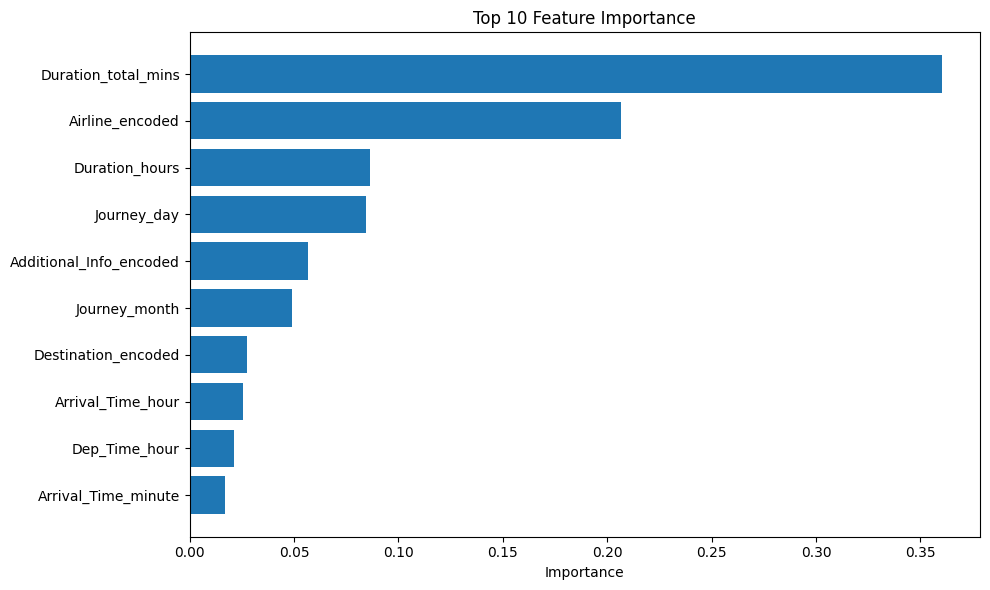

In [172]:
# feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance (Random Forest):")
print(feature_importance)

# plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [173]:
# cross-validation for both models
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

print("Cross-Validation Results:")
print(f"Linear Regression CV R² Mean: {lr_cv_scores.mean():.4f} (+/- {lr_cv_scores.std() * 2:.4f})")
print(f"Random Forest CV R² Mean: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")

Cross-Validation Results:
Linear Regression CV R² Mean: 0.5707 (+/- 0.0807)
Random Forest CV R² Mean: 0.8816 (+/- 0.0269)


# **12. Final Predictions & Optimization**

Applying same preprocessing to test data

In [174]:
print("Test data columns:", test_data.columns.tolist())
print("Test data shape:", test_data.shape)

# applying same date processing
test_data['Date_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'], dayfirst=True)
test_data["Journey_day"] = test_data['Date_of_Journey'].dt.day
test_data["Journey_month"] = test_data['Date_of_Journey'].dt.month
test_data["Journey_year"] = test_data['Date_of_Journey'].dt.year

Test data columns: ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']
Test data shape: (2671, 10)


In [175]:
# processing Dep_Time
test_data['Dep_Time_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_Time_minute'] = pd.to_datetime(test_data['Dep_Time']).dt.minute

# process Arrival_Time
test_data['Arrival_Time_hour'] = pd.to_datetime(test_data['Arrival_Time'], errors='coerce').dt.hour
test_data['Arrival_Time_minute'] = pd.to_datetime(test_data['Arrival_Time'], errors='coerce').dt.minute

#filling NaN values with median
test_data['Arrival_Time_hour'].fillna(test_data['Arrival_Time_hour'].median(), inplace=True)
test_data['Arrival_Time_minute'].fillna(test_data['Arrival_Time_minute'].median(), inplace=True)

In [176]:
# Duration
def extract_duration_features(duration_str):
    if pd.isna(duration_str):
        return 0, 0

    hours = 0
    minutes = 0

    if 'h' in duration_str:
        hours = int(duration_str.split('h')[0])
    if 'm' in duration_str:
        minutes_part = duration_str.split('h')[-1] if 'h' in duration_str else duration_str
        if 'm' in minutes_part:
            minutes = int(minutes_part.split('m')[0].strip())

    return hours, minutes

#duration processing
duration_features = test_data['Duration'].apply(extract_duration_features)
test_data['Duration_hours'] = [x[0] for x in duration_features]
test_data['Duration_mins'] = [x[1] for x in duration_features]
test_data['Duration_total_mins'] = test_data['Duration_hours'] * 60 + test_data['Duration_mins']

In [177]:
#source one-hot encoding
source_dummies_test = pd.get_dummies(test_data['Source'], prefix='Source')
test_data = pd.concat([test_data, source_dummies_test], axis=1)

#same encodings as training data
test_data['Airline_encoded'] = test_data['Airline'].map(airline_encoding)
test_data['Destination_encoded'] = test_data['Destination'].map(destination_encoding)
test_data['Total_Stops_encoded'] = test_data['Total_Stops'].map(stops_mapping)
test_data['Additional_Info_encoded'] = test_data['Additional_Info'].map(additional_info_encoding)
test_data['Route_stops_count'] = test_data['Route'].apply(count_route_stops)

#handling missing values in encodings
test_data['Airline_encoded'].fillna(-1, inplace=True)
test_data['Destination_encoded'].fillna(-1, inplace=True)
test_data['Additional_Info_encoded'].fillna(-1, inplace=True)

In [178]:
# removing unnecessary columns from test data
test_columns_to_drop = [
    'Airline', 'Date_of_Journey', 'Source', 'Destination',
    'Route', 'Dep_Time', 'Arrival_Time', 'Duration',
    'Total_Stops', 'Additional_Info'
]

test_processed = test_data.drop(columns=test_columns_to_drop)

# ensuring test data has same columns as training data
missing_cols = set(X.columns) - set(test_processed.columns)
for col in missing_cols:
    test_processed[col] = 0

# reordering columns to match training data
test_processed = test_processed[X.columns]

print(f"Test data processed shape: {test_processed.shape}")
print(f"Training data shape: {X.shape}")
print("Column alignment check:", all(test_processed.columns == X.columns))

Test data processed shape: (2671, 20)
Training data shape: (10682, 20)
Column alignment check: True


In [179]:
# predictions using the best model (Random Forest)
test_predictions = rf_model.predict(test_processed)

print(f"Generated {len(test_predictions)} predictions")
print(f"Prediction range: {test_predictions.min():.2f} to {test_predictions.max():.2f}")
print(f"Mean prediction: {test_predictions.mean():.2f}")

# Create submission dataframe
submission = pd.DataFrame({
    'Predicted_Price': test_predictions
})

print("\nSubmission preview:")
print(submission.head(10))

Generated 2671 predictions
Prediction range: 1969.76 to 59452.36
Mean prediction: 9126.58

Submission preview:
   Predicted_Price
0       14697.0000
1        4242.3300
2       12891.4100
3       13016.0095
4        3580.1700
5       10262.0000
6       10746.5000
7        4892.1100
8        4412.3700
9       14758.1700


In [180]:
# hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# grid search with cross-validation
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

print("Best parameters:", rf_grid.best_params_)
print("Best cross-validation score:", rf_grid.best_score_)

#best model for final predictions
best_rf_model = rf_grid.best_estimator_
final_test_predictions = best_rf_model.predict(test_processed)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.8577887204813196


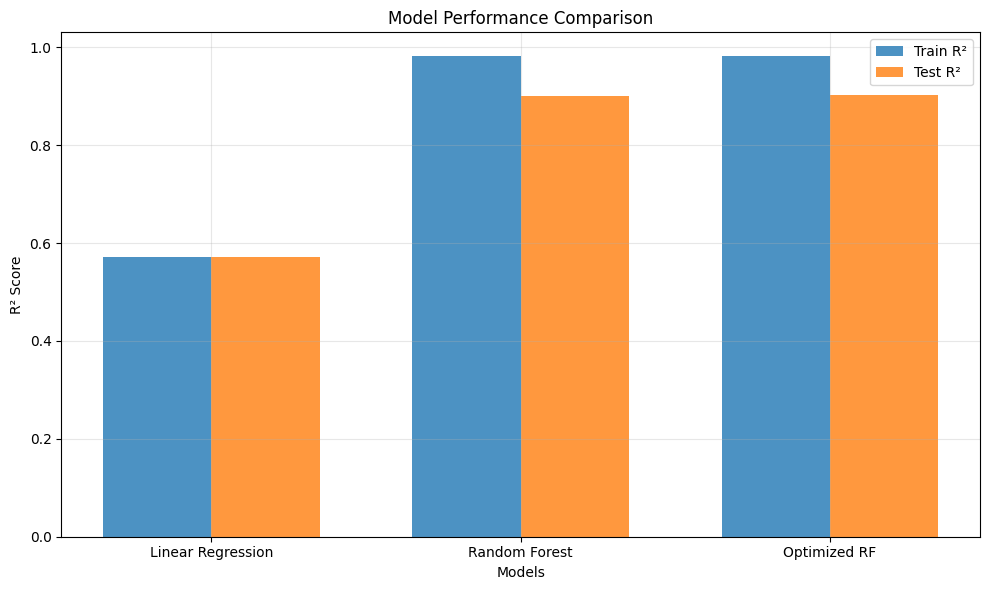


Final Model Comparison:
Linear Regression: Train R² = 0.5709, Test R² = 0.5709
Random Forest: Train R² = 0.9816, Test R² = 0.9010
Optimized RF: Train R² = 0.9816, Test R² = 0.9036


In [181]:
# comparison chart
models = ['Linear Regression', 'Random Forest', 'Optimized RF']
train_scores = [lr_train_r2, rf_train_r2, r2_score(y_train, best_rf_model.predict(X_train))]
test_scores = [lr_test_r2, rf_test_r2, r2_score(y_test, best_rf_model.predict(X_test))]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, train_scores, width, label='Train R²', alpha=0.8)
ax.bar(x + width/2, test_scores, width, label='Test R²', alpha=0.8)

ax.set_xlabel('Models')
ax.set_ylabel('R² Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final comparison
print("\nFinal Model Comparison:")
for i, model in enumerate(models):
    print(f"{model}: Train R² = {train_scores[i]:.4f}, Test R² = {test_scores[i]:.4f}")

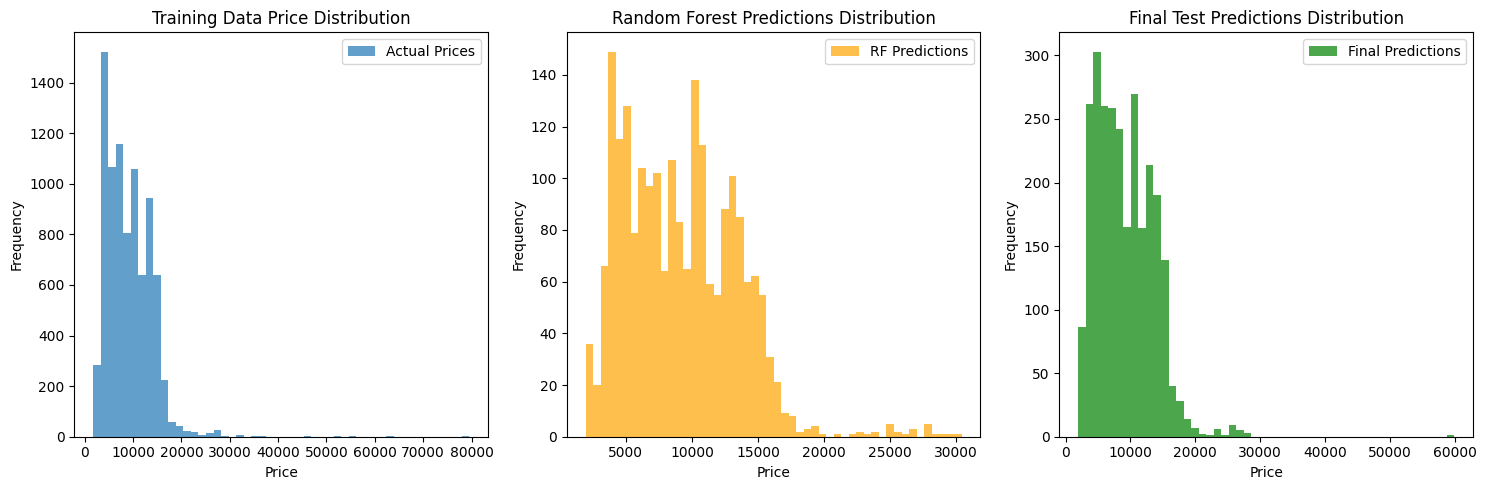

In [182]:
# prediction distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(y_train, bins=50, alpha=0.7, label='Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Training Data Price Distribution')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(rf_test_pred, bins=50, alpha=0.7, label='RF Predictions', color='orange')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Random Forest Predictions Distribution')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(final_test_predictions, bins=50, alpha=0.7, label='Final Predictions', color='green')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Final Test Predictions Distribution')
plt.legend()

plt.tight_layout()
plt.show()

Final Model Feature Importance:
                    feature  importance
9       Duration_total_mins    0.368821
15          Airline_encoded    0.208386
0               Journey_day    0.083771
7            Duration_hours    0.075918
18  Additional_Info_encoded    0.058308
1             Journey_month    0.048122
16      Destination_encoded    0.027358
5         Arrival_Time_hour    0.024857
3             Dep_Time_hour    0.021646
6       Arrival_Time_minute    0.016347
4           Dep_Time_minute    0.015702
8             Duration_mins    0.013344
17      Total_Stops_encoded    0.009466
19        Route_stops_count    0.009067
10          Source_Banglore    0.007645
12             Source_Delhi    0.005446
11           Source_Kolkata    0.002771
14            Source_Mumbai    0.002470
13           Source_Chennai    0.000556
2              Journey_year    0.000000


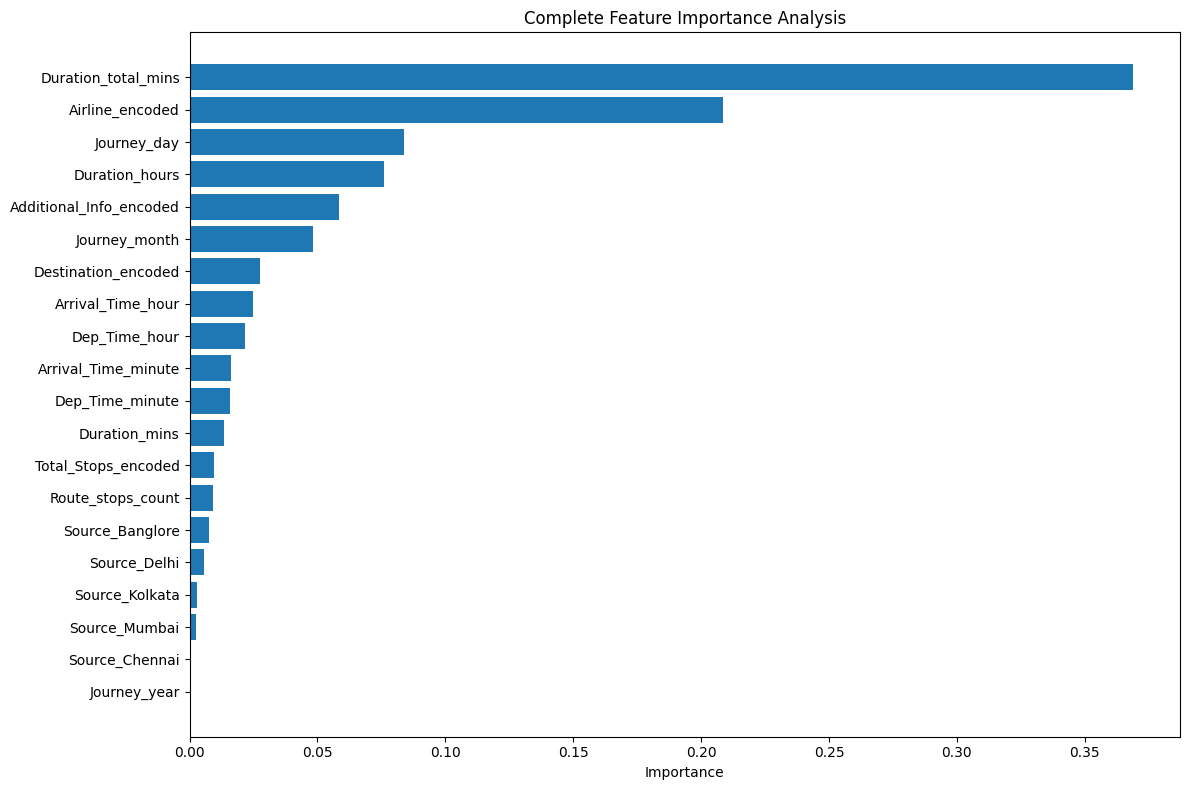


Top 5 Most Important Features:
Duration_total_mins: 0.3688
Airline_encoded: 0.2084
Journey_day: 0.0838
Duration_hours: 0.0759
Additional_Info_encoded: 0.0583


In [183]:
# analysing feature importance
final_feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Final Model Feature Importance:")
print(final_feature_importance)

# feature importance plot
plt.figure(figsize=(12, 8))
plt.barh(final_feature_importance['feature'], final_feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Complete Feature Importance Analysis')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# top 5 most important features
print("\nTop 5 Most Important Features:")
for i, row in final_feature_importance.head().iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")


In [184]:
# final results summary
final_results = {
    'Model': 'Optimized Random Forest',
    'Training_R2': r2_score(y_train, best_rf_model.predict(X_train)),
    'Testing_R2': r2_score(y_test, best_rf_model.predict(X_test)),
    'Training_RMSE': np.sqrt(mean_squared_error(y_train, best_rf_model.predict(X_train))),
    'Testing_RMSE': np.sqrt(mean_squared_error(y_test, best_rf_model.predict(X_test))),
    'Training_MAE': mean_absolute_error(y_train, best_rf_model.predict(X_train)),
    'Testing_MAE': mean_absolute_error(y_test, best_rf_model.predict(X_test))
}

print("="*50)
print("FINAL PROJECT RESULTS SUMMARY")
print("="*50)
for key, value in final_results.items():
    if isinstance(value, float):
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {value}")

print(f"\nTotal Predictions Generated: {len(final_test_predictions)}")
print(f"Prediction Range: ₹{final_test_predictions.min():.2f} - ₹{final_test_predictions.max():.2f}")
print(f"Average Predicted Price: ₹{final_test_predictions.mean():.2f}")

FINAL PROJECT RESULTS SUMMARY
Model: Optimized Random Forest
Training_R2: 0.9816
Testing_R2: 0.9036
Training_RMSE: 624.3602
Testing_RMSE: 1441.3611
Training_MAE: 278.4977
Testing_MAE: 639.6416

Total Predictions Generated: 2671
Prediction Range: ₹1968.41 - ₹59892.06
Average Predicted Price: ₹9130.76
